In this notebook, I try fitting the EDGES data with polynomials of varying degrees and compare the maximum likelihoods of each fit to see whether certain polynomial degrees are preferred. We compare different hypotheses on the foreground polynomials of order $m$ and $n$ using
\begin{equation}
\frac{P(H_m|D)}{P(H_n|D)} = \frac{P(D|H_m)}{P(D|H_n)}
\end{equation}
where $P(H_m|D)$ is the probability of some hypothesis for a polynomial of order $m$ $H_m$ is true given observed data $D$ and $P(H_n|D)$ is the probability of hypothesis $H_n$ for a polynomial of length $n$ being true given data $D$. 

We investigate varying the number of polynomial terms and compare the likelihoods for an absorption trough plus some number of terms. 

Text(0.5,1,'ABC123 vs $\\mathrm{ABC123}^{123}$')

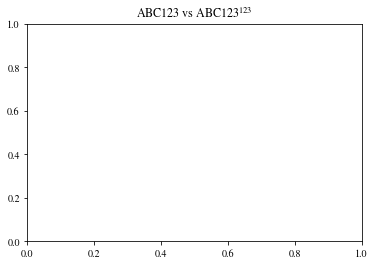

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os,sys
import corner
sys.path.append(os.path.abspath('../edges/'))
import global_sampler as GS
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

Initialize our samplers.

In [2]:
samplers=[GS.Sampler('../config/hypothesis_nforegrounds_%d.yaml'%(nf)) for nf in range(1,8)]

Run the samplers. 

In [3]:
for sampler in samplers:
    print('sampling.')
    sampler.sample()

sampling.
{'NU0': 84.88167556038029, 'TAU': 2.584225397077682, 'A': 38.66498637845529, 'W': 55.28499747299032, 'NPOLY': 1, 'APOLY0': 1675.241748110825}
sampling.
{'NU0': 85.0826356227275, 'TAU': 1.7812618276941263, 'A': 7.098082671163747, 'W': 40.567737033283436, 'NPOLY': 2, 'APOLY0': 1733.9768701849089, 'APOLY1': -89.80274272202234}
sampling.
{'NU0': 78.58361562496106, 'TAU': 2.9402693556875947, 'A': 1.428801340854471, 'W': 20.77651664618726, 'NPOLY': 3, 'APOLY0': 1734.5391896474093, 'APOLY1': -79.48429073329092, 'APOLY2': -16.01494802713049}
sampling.
{'NU0': 78.2032216534345, 'TAU': 7.286991210160019, 'A': 0.49943098788896145, 'W': 18.622002777849925, 'NPOLY': 4, 'APOLY0': 1688.6473686225474, 'APOLY1': 79.59565186641647, 'APOLY2': -195.65538770601904, 'APOLY3': 65.54236007258538}
sampling.
{'NU0': 78.19248036181872, 'TAU': 6.208755070598689, 'A': 0.5723449611418114, 'W': 18.686475220322485, 'NPOLY': 5, 'APOLY0': 1713.543422362702, 'APOLY1': -20.5201242466218, 'APOLY2': -47.557029743

Make corner plots for our various hypotheses. 

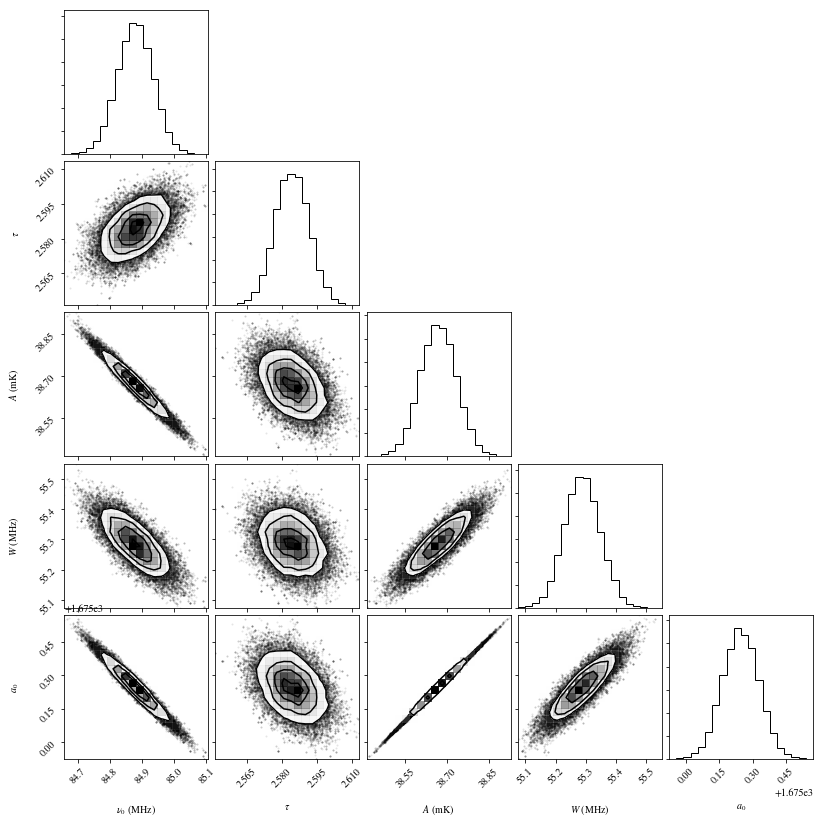

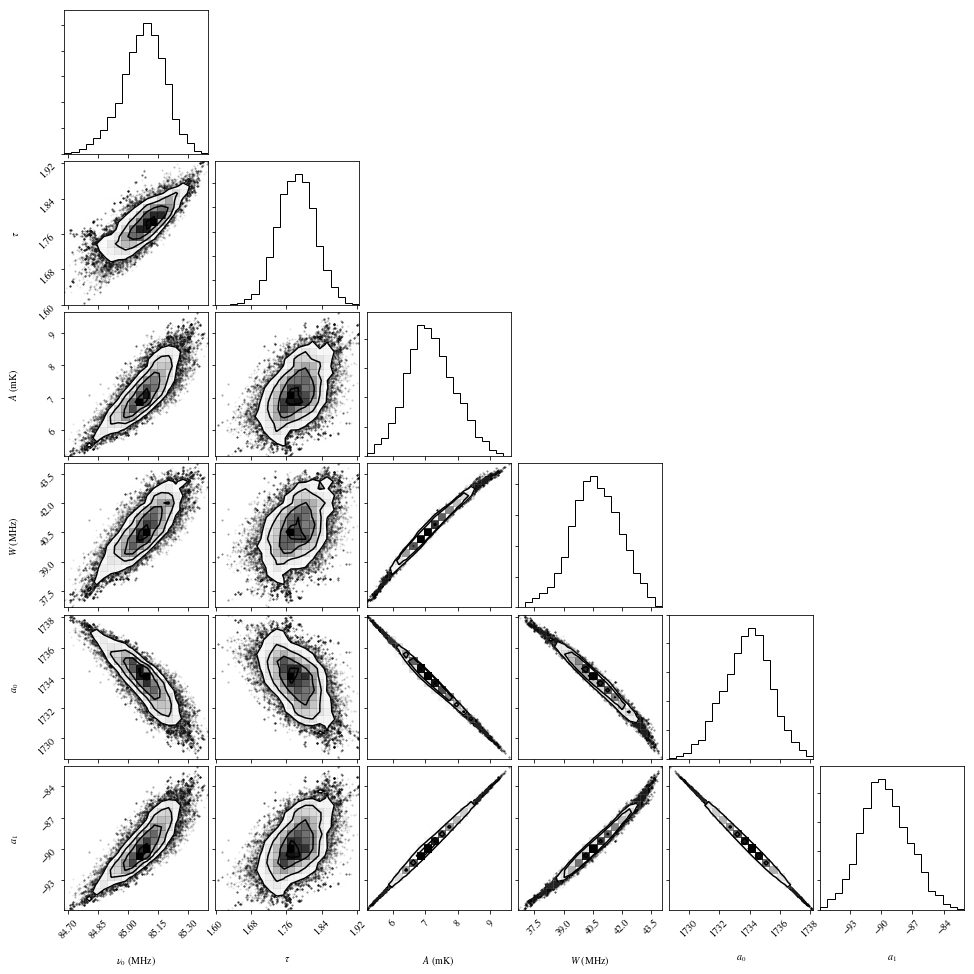

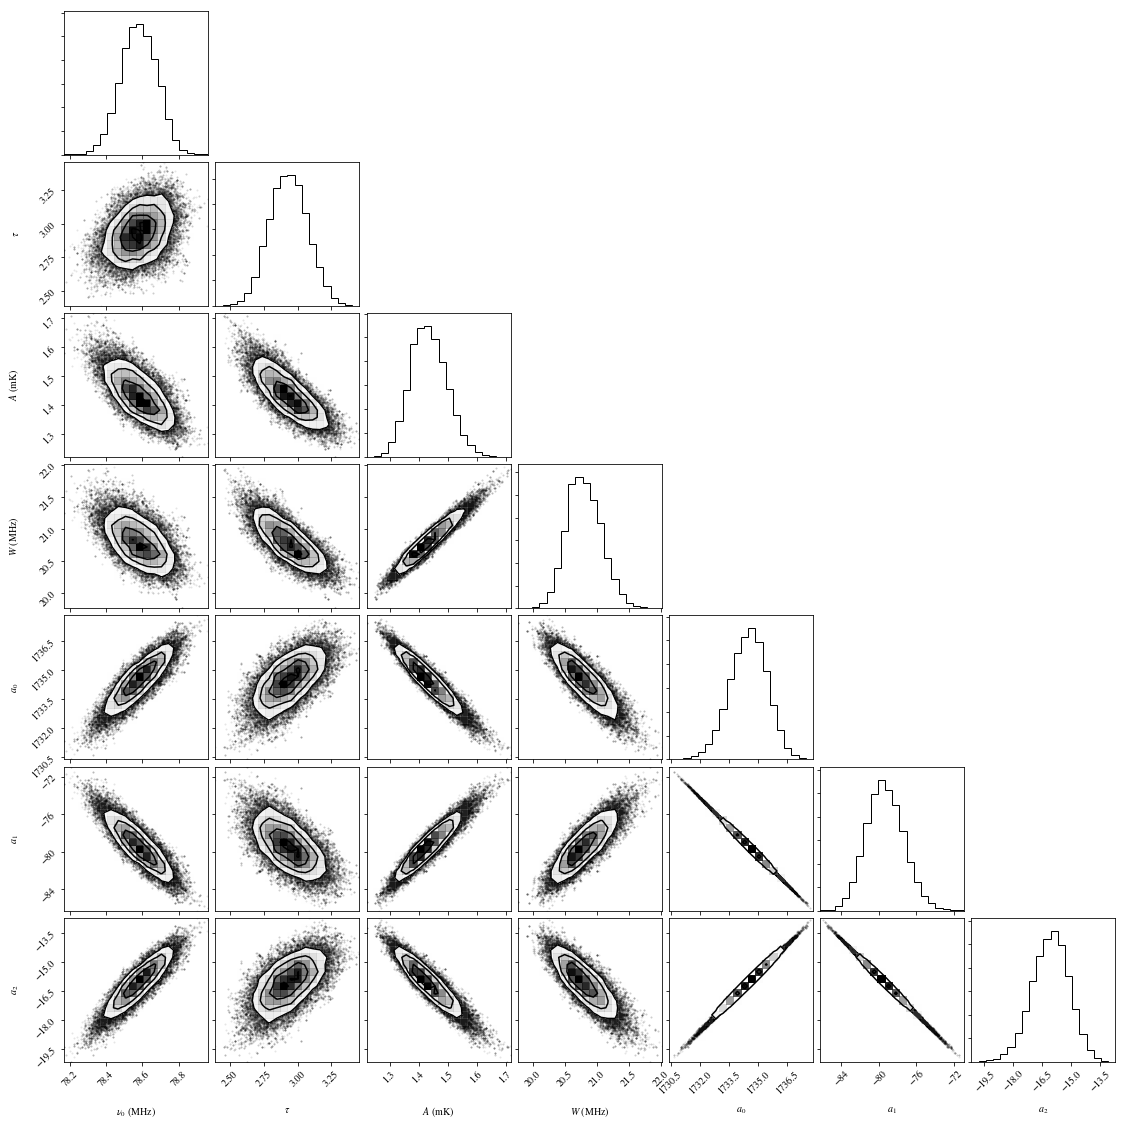

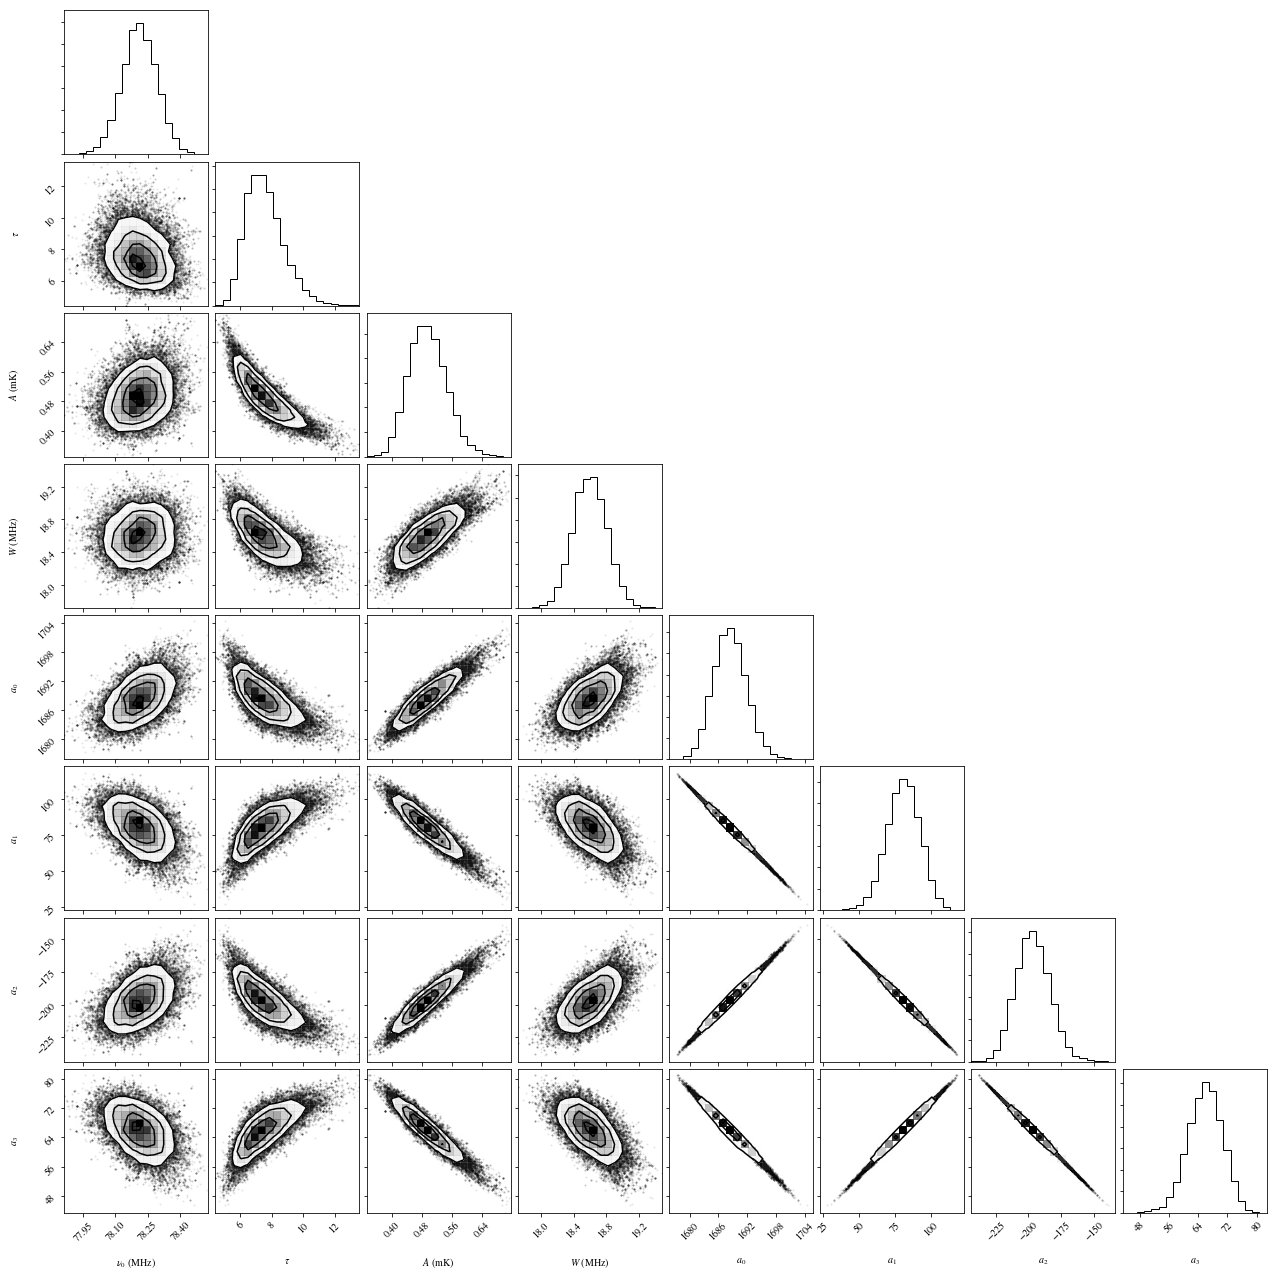

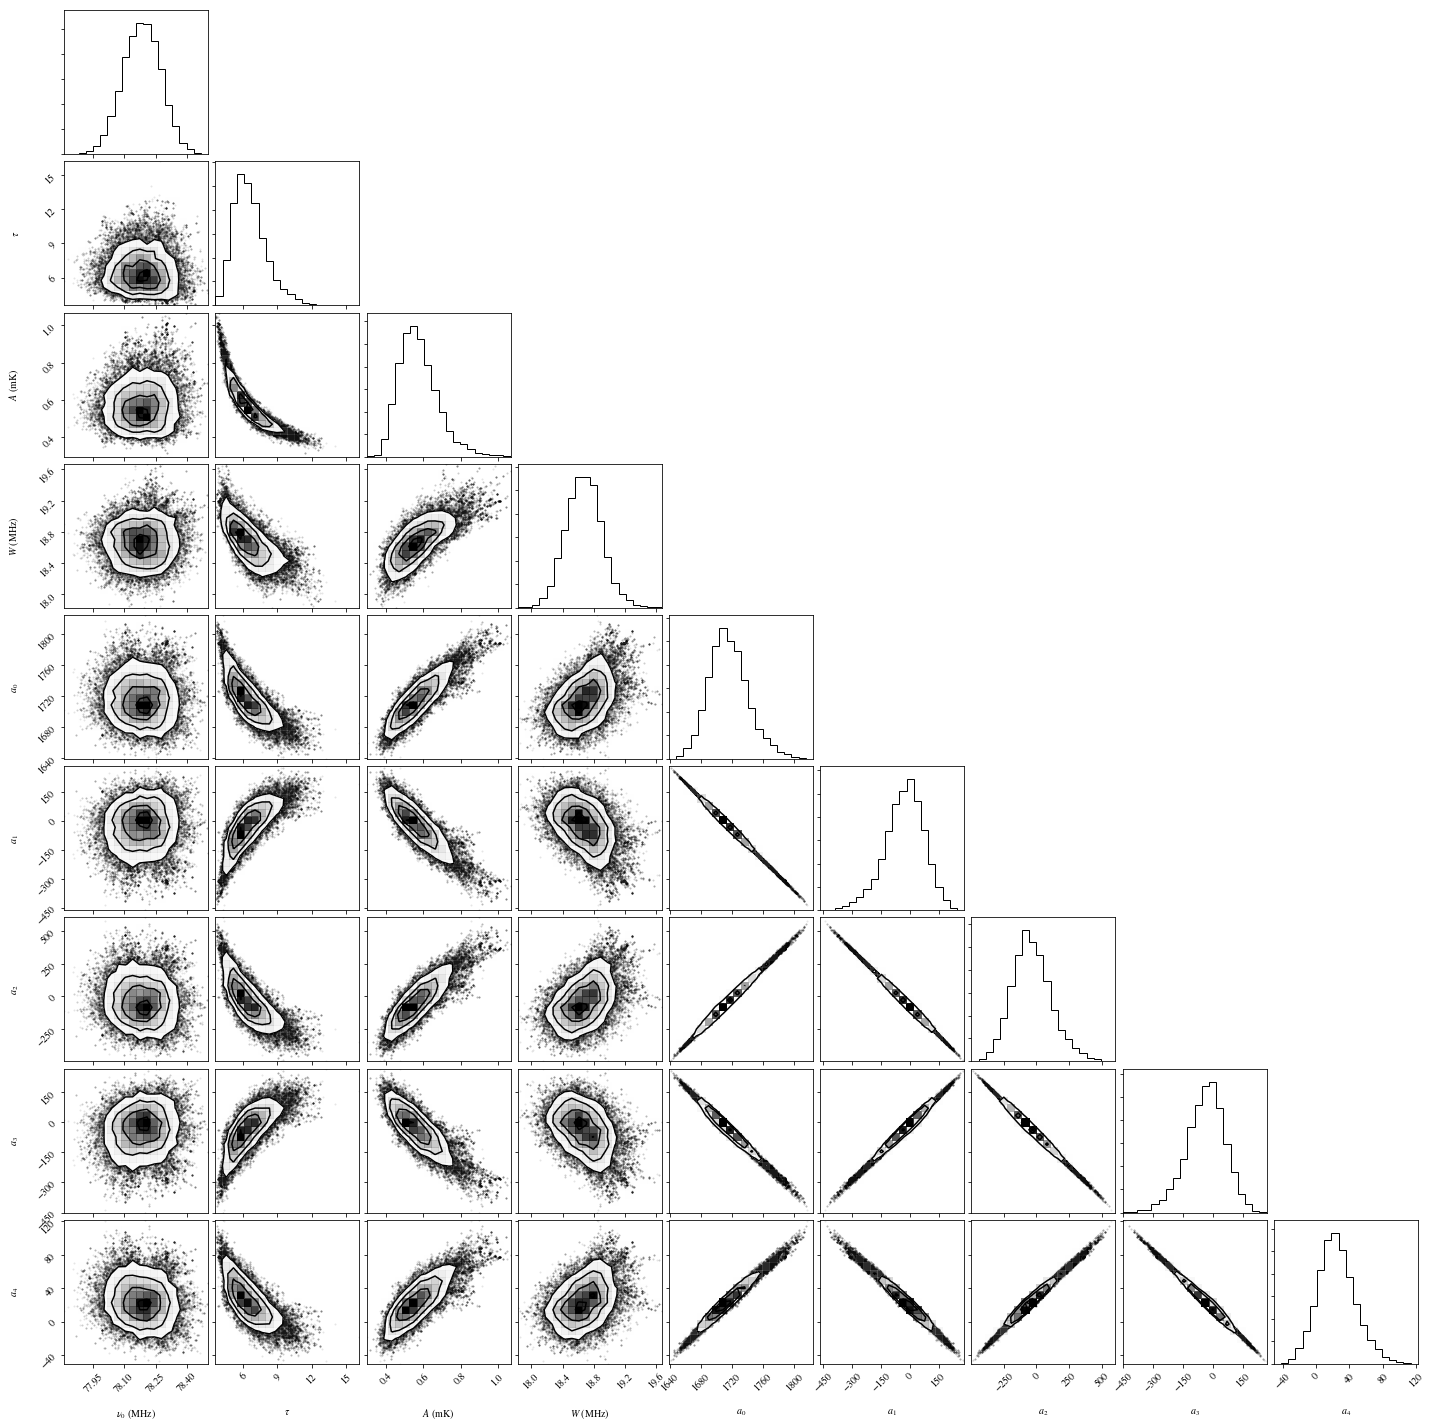

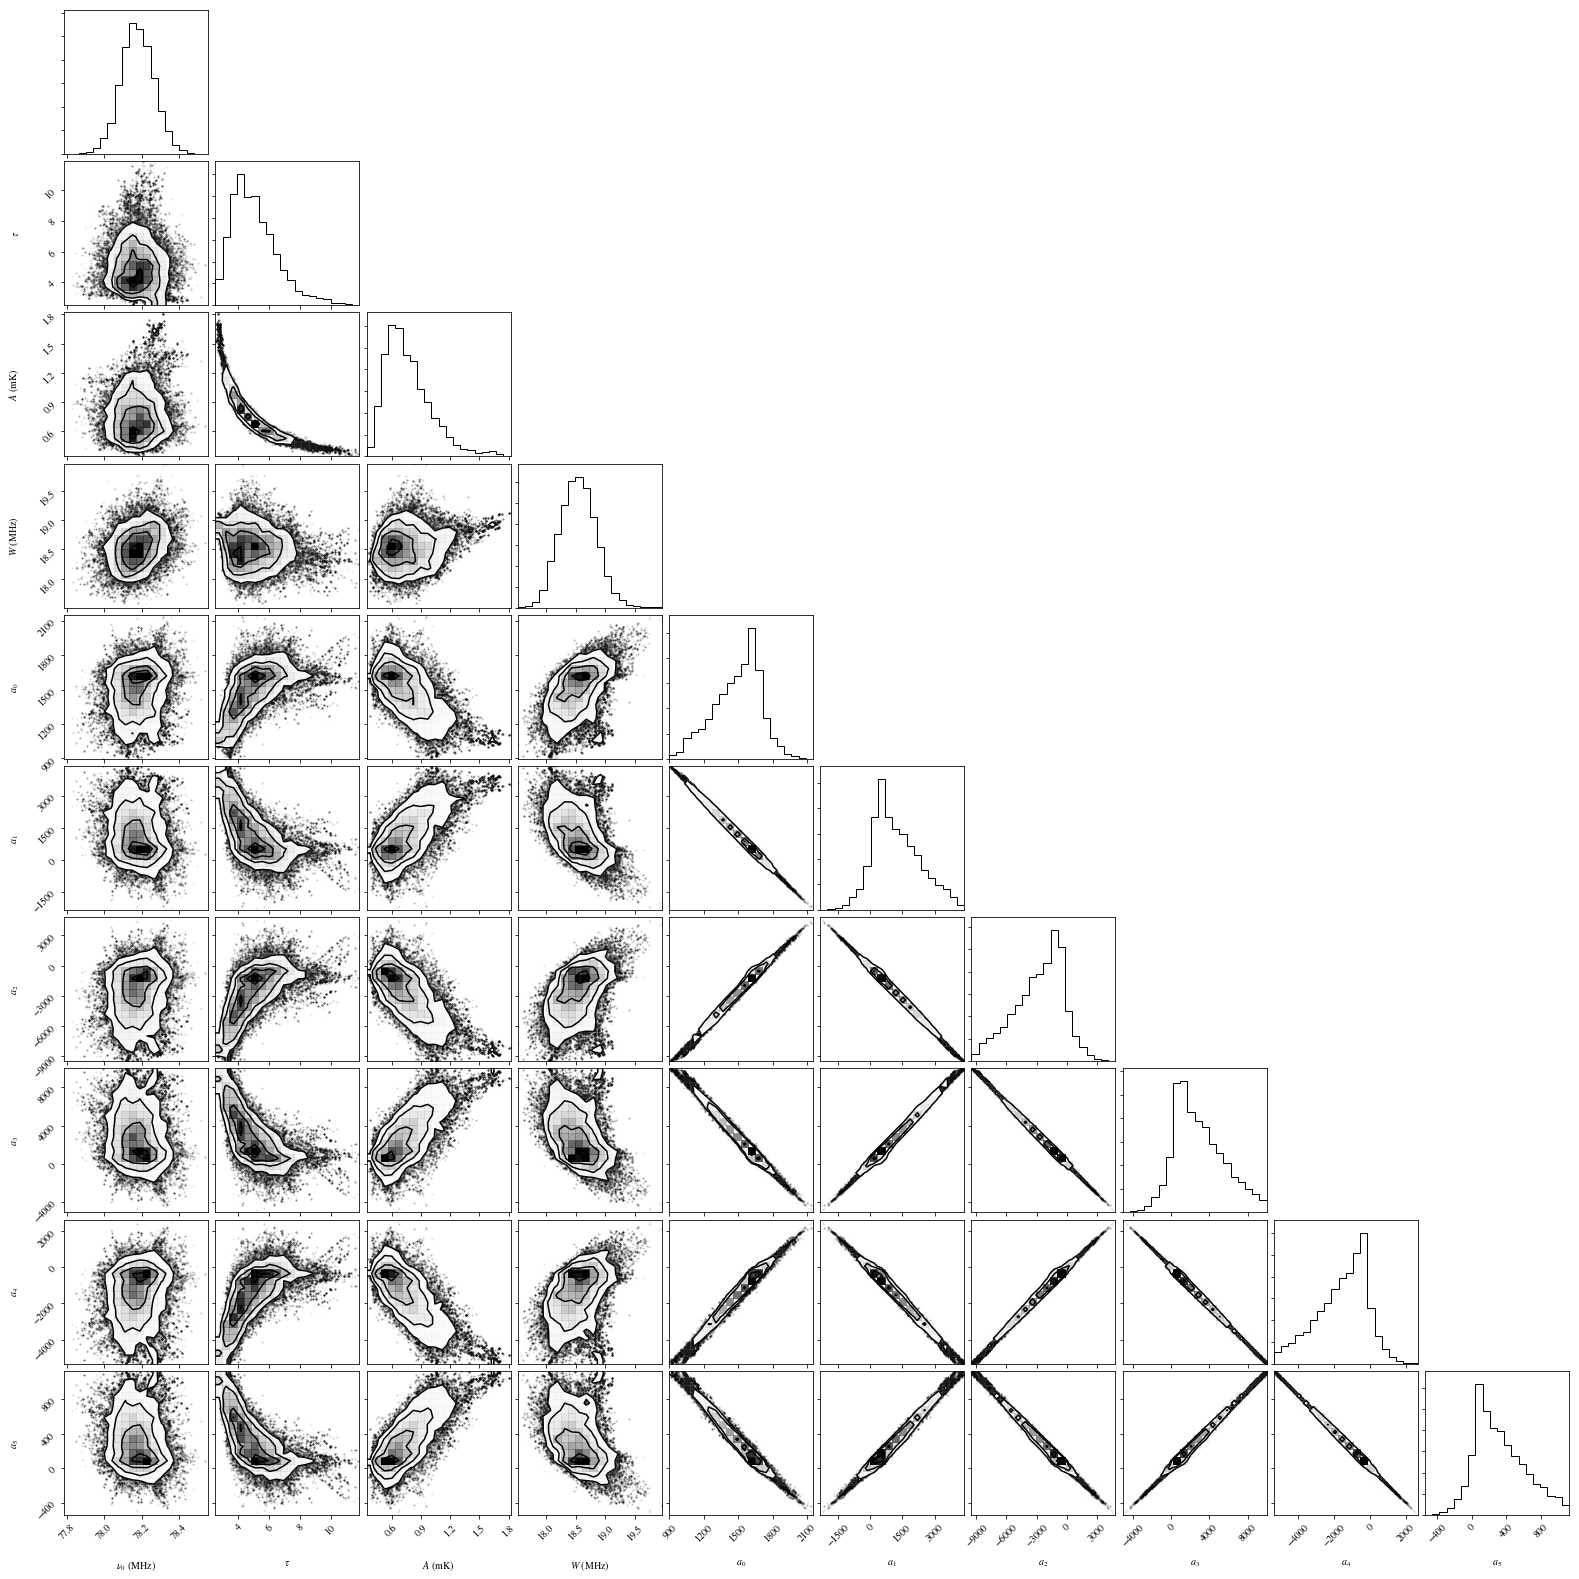

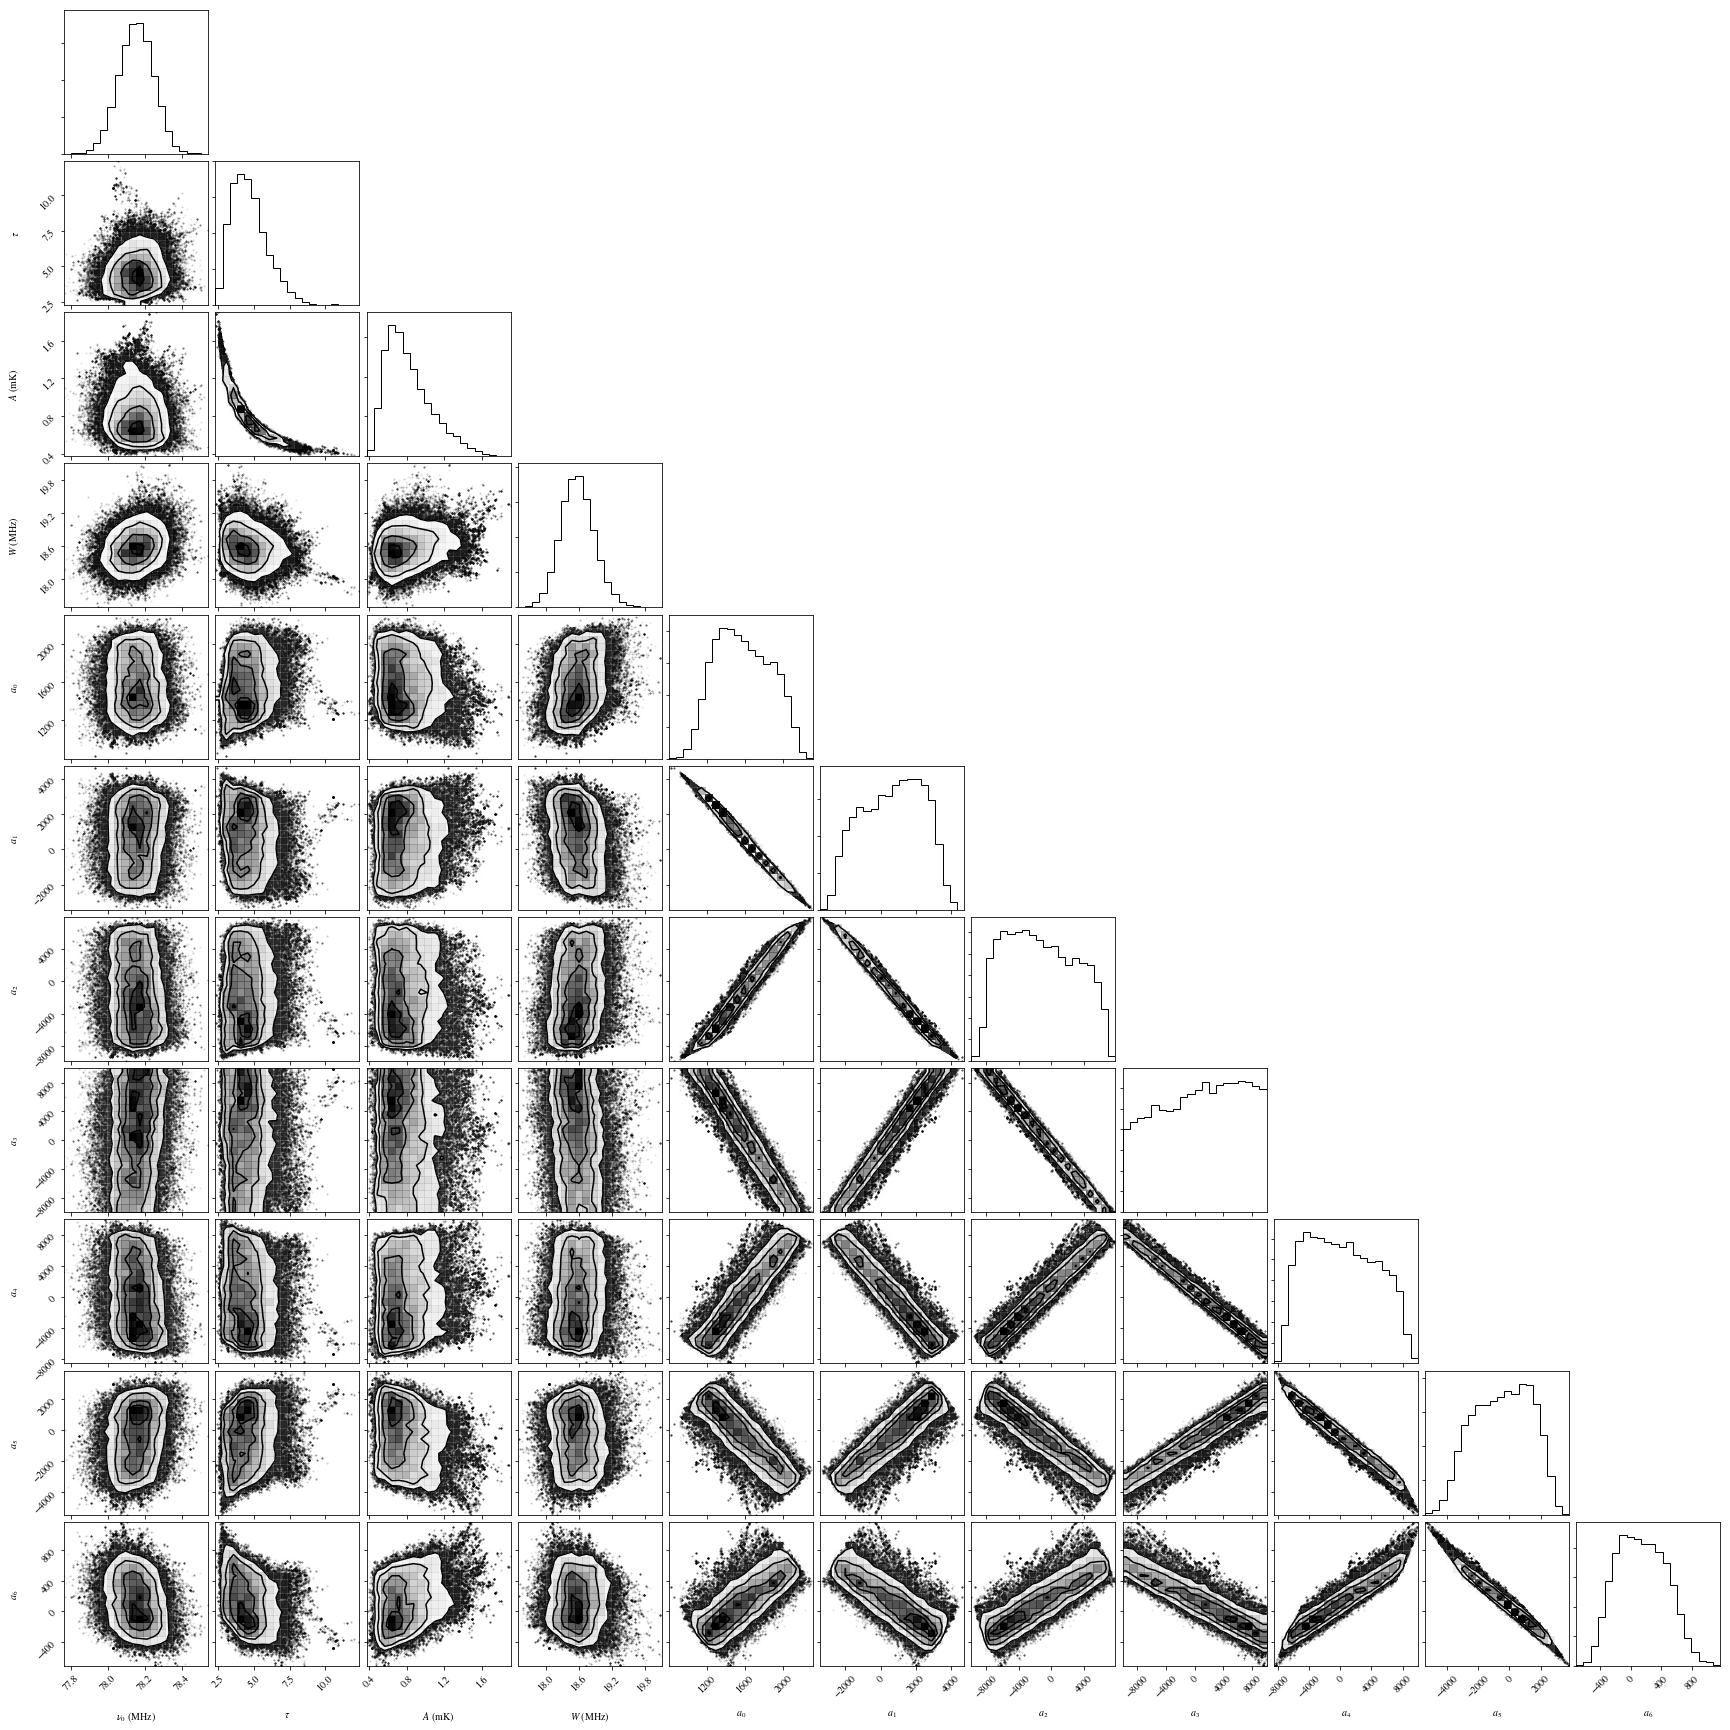

In [4]:
labels=['$\\nu_0$ (MHz)','$\\tau$','$A$ (mK)','$W$ (MHz)','$a_0$']
nlabel=1
for sampler in samplers:
    samples=sampler.sampler.chain[:, sampler.config['NBURN']:, :].reshape((-1, len(sampler.params_vary)))
    corner.corner(samples,labels=labels)
    labels.append('$a_%d$'%(nlabel))
    nlabel+=1

Plot the maximum likelihood model, some draws, and the model

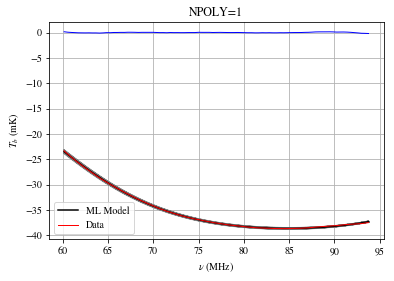

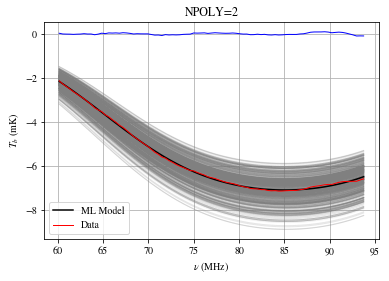

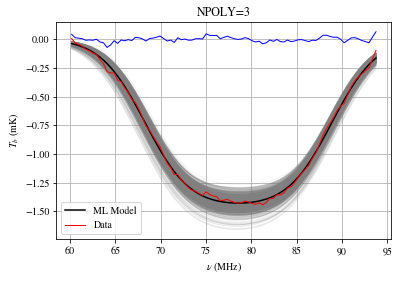

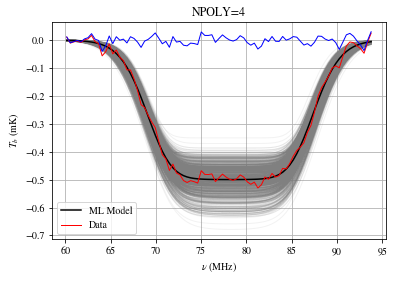

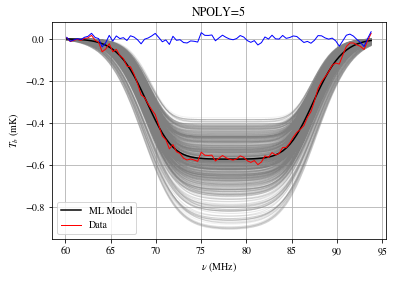

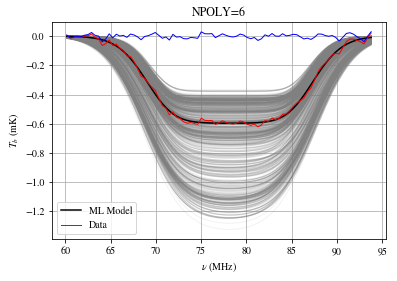

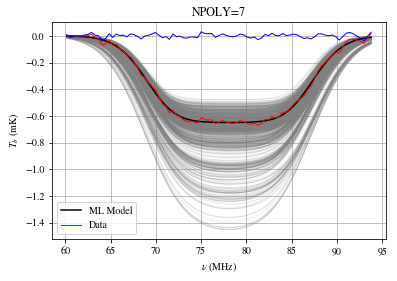

In [5]:

ndraws=1000
for sampler in samplers:
    samples=sampler.sampler.chain[:, sampler.config['NBURN']:, :].reshape((-1, len(sampler.params_vary)))
    for drawnum in range(ndraws):
        draw=np.random.randint(0,5000)
        params={'NU0':samples[draw,0],'TAU':samples[draw,1],'A':samples[draw,2],'W':samples[draw,3]}
        plt.plot(sampler.freqs,GS.delta_Tb_analytic(sampler.freqs,**params),color='grey',lw=1,alpha=.1)
    l1=plt.plot(sampler.freqs,GS.TbSky(sampler.ml_params,sampler.freqs,sampler.params_all,[])\
            -GS.Tbfg(sampler.freqs,sampler.params_all),color='k')[0]
    l2=plt.plot(sampler.freqs,sampler.tb_meas-GS.Tbfg(sampler.freqs,sampler.params_all),color='r',lw=1)[0]
    #l3=plt.plot(sampler.freqs,sampler.tb_meas-GSBH_MCMC.TbSky(ml_samples,sampler.freqs,
    #sampler.params_all,[],sampler.analytic),color='blue',lw=1)[0]
    l3=plt.plot(sampler.freqs,sampler.resid,color='blue',lw=1)[0]
    #plt.ylim(-.6,.1)
    plt.xlabel('$\\nu$ (MHz)')
    plt.ylabel('$T_b$ (mK)')
    plt.title('NPOLY=%d'%sampler.params_all['NPOLY'])
    plt.legend((l1,l2),('ML Model','Data'))
    plt.grid()
    plt.show()

Now make a table of maximum likelihoods. 

Text(0,0.5,'maximum log-likelihood')

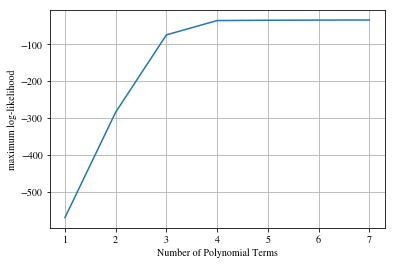

In [6]:
npolys=[]
log_likelihoods=[]
for s,sampler in enumerate(samplers):
    npolys.append(s+1)
    log_likelihoods.append(sampler.ln_ml)
plt.plot(npolys,log_likelihoods)
plt.grid()
plt.xlabel('Number of Polynomial Terms')
plt.ylabel('maximum log-likelihood')

Here, we plot the likelihoods for our different polynomial-order hypothesis. The data definitely prefers foregrounds with complexity of three polynomial terms or greater. Strangely, likelihood continues to increase as we add more polynomial terms (occam's razor does not seem to kick in for any of the complexities we consider). 

Text(0,0.5,'maximum likelihood')

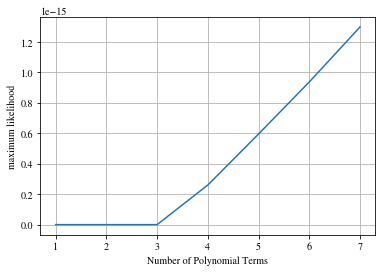

In [7]:
npolys=[]
log_likelihoods=[]
for s,sampler in enumerate(samplers):
    npolys.append(s+1)
    log_likelihoods.append(sampler.ln_ml)
plt.plot(npolys,np.exp(log_likelihoods))
plt.grid()
plt.xlabel('Number of Polynomial Terms')
plt.ylabel('maximum likelihood')